In [1]:
import util
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_probability as tfp
from keras.layers import Dense, Input
from keras.models import Model
import keras.backend as K
from keras.optimizers import Adam, RMSprop

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
import import_ipynb
from vae_tf_v2 import VariationalAutoencoder, calc_expected_log_likelihood, calc_kl_divergence

importing Jupyter notebook from vae_tf_v2.ipynb


In [4]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 400 # 200 e.g. is really fine, but slower

In [4]:
if __name__ == '__main__' :
    X, Y = util.get_mnist()
    N, D = X.shape
    print(X.shape, Y.shape, sep='\n')

Reading in and transforming data...
(42000, 784)
(42000,)


In [5]:
X = (X > 0.5).astype(np.float32)

In [7]:
if __name__ == '__main__' :
    vae = VariationalAutoencoder(D, [200, 100, 2])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
 encoder_output (Distributio  ((None, 2),              0         
 nLambda)                     (None, 2))                         
                                                                 
Total params: 177,504
Trainable params: 177,504
Non-trainable params: 0
_______________________________________________________

In [ ]:
if __name__ == '__main__' :
    vae.compile(
        opt = Adam(learning_rate=0.001), 
        calc_kl_divergence = calc_kl_divergence, 
        calc_expected_log_likelihood = calc_expected_log_likelihood, 
        run_eagerly=False
    )
    r = vae.fit(
        X, X, epochs = 500, batch_size = 24,
    )

In [10]:
# Save the model.
#vae.save_weights('vae_tf_v2_weights', save_format='tf')

In [8]:
if __name__ == '__main__' :
    vae.load_weights('vae_tf_v2_weights')

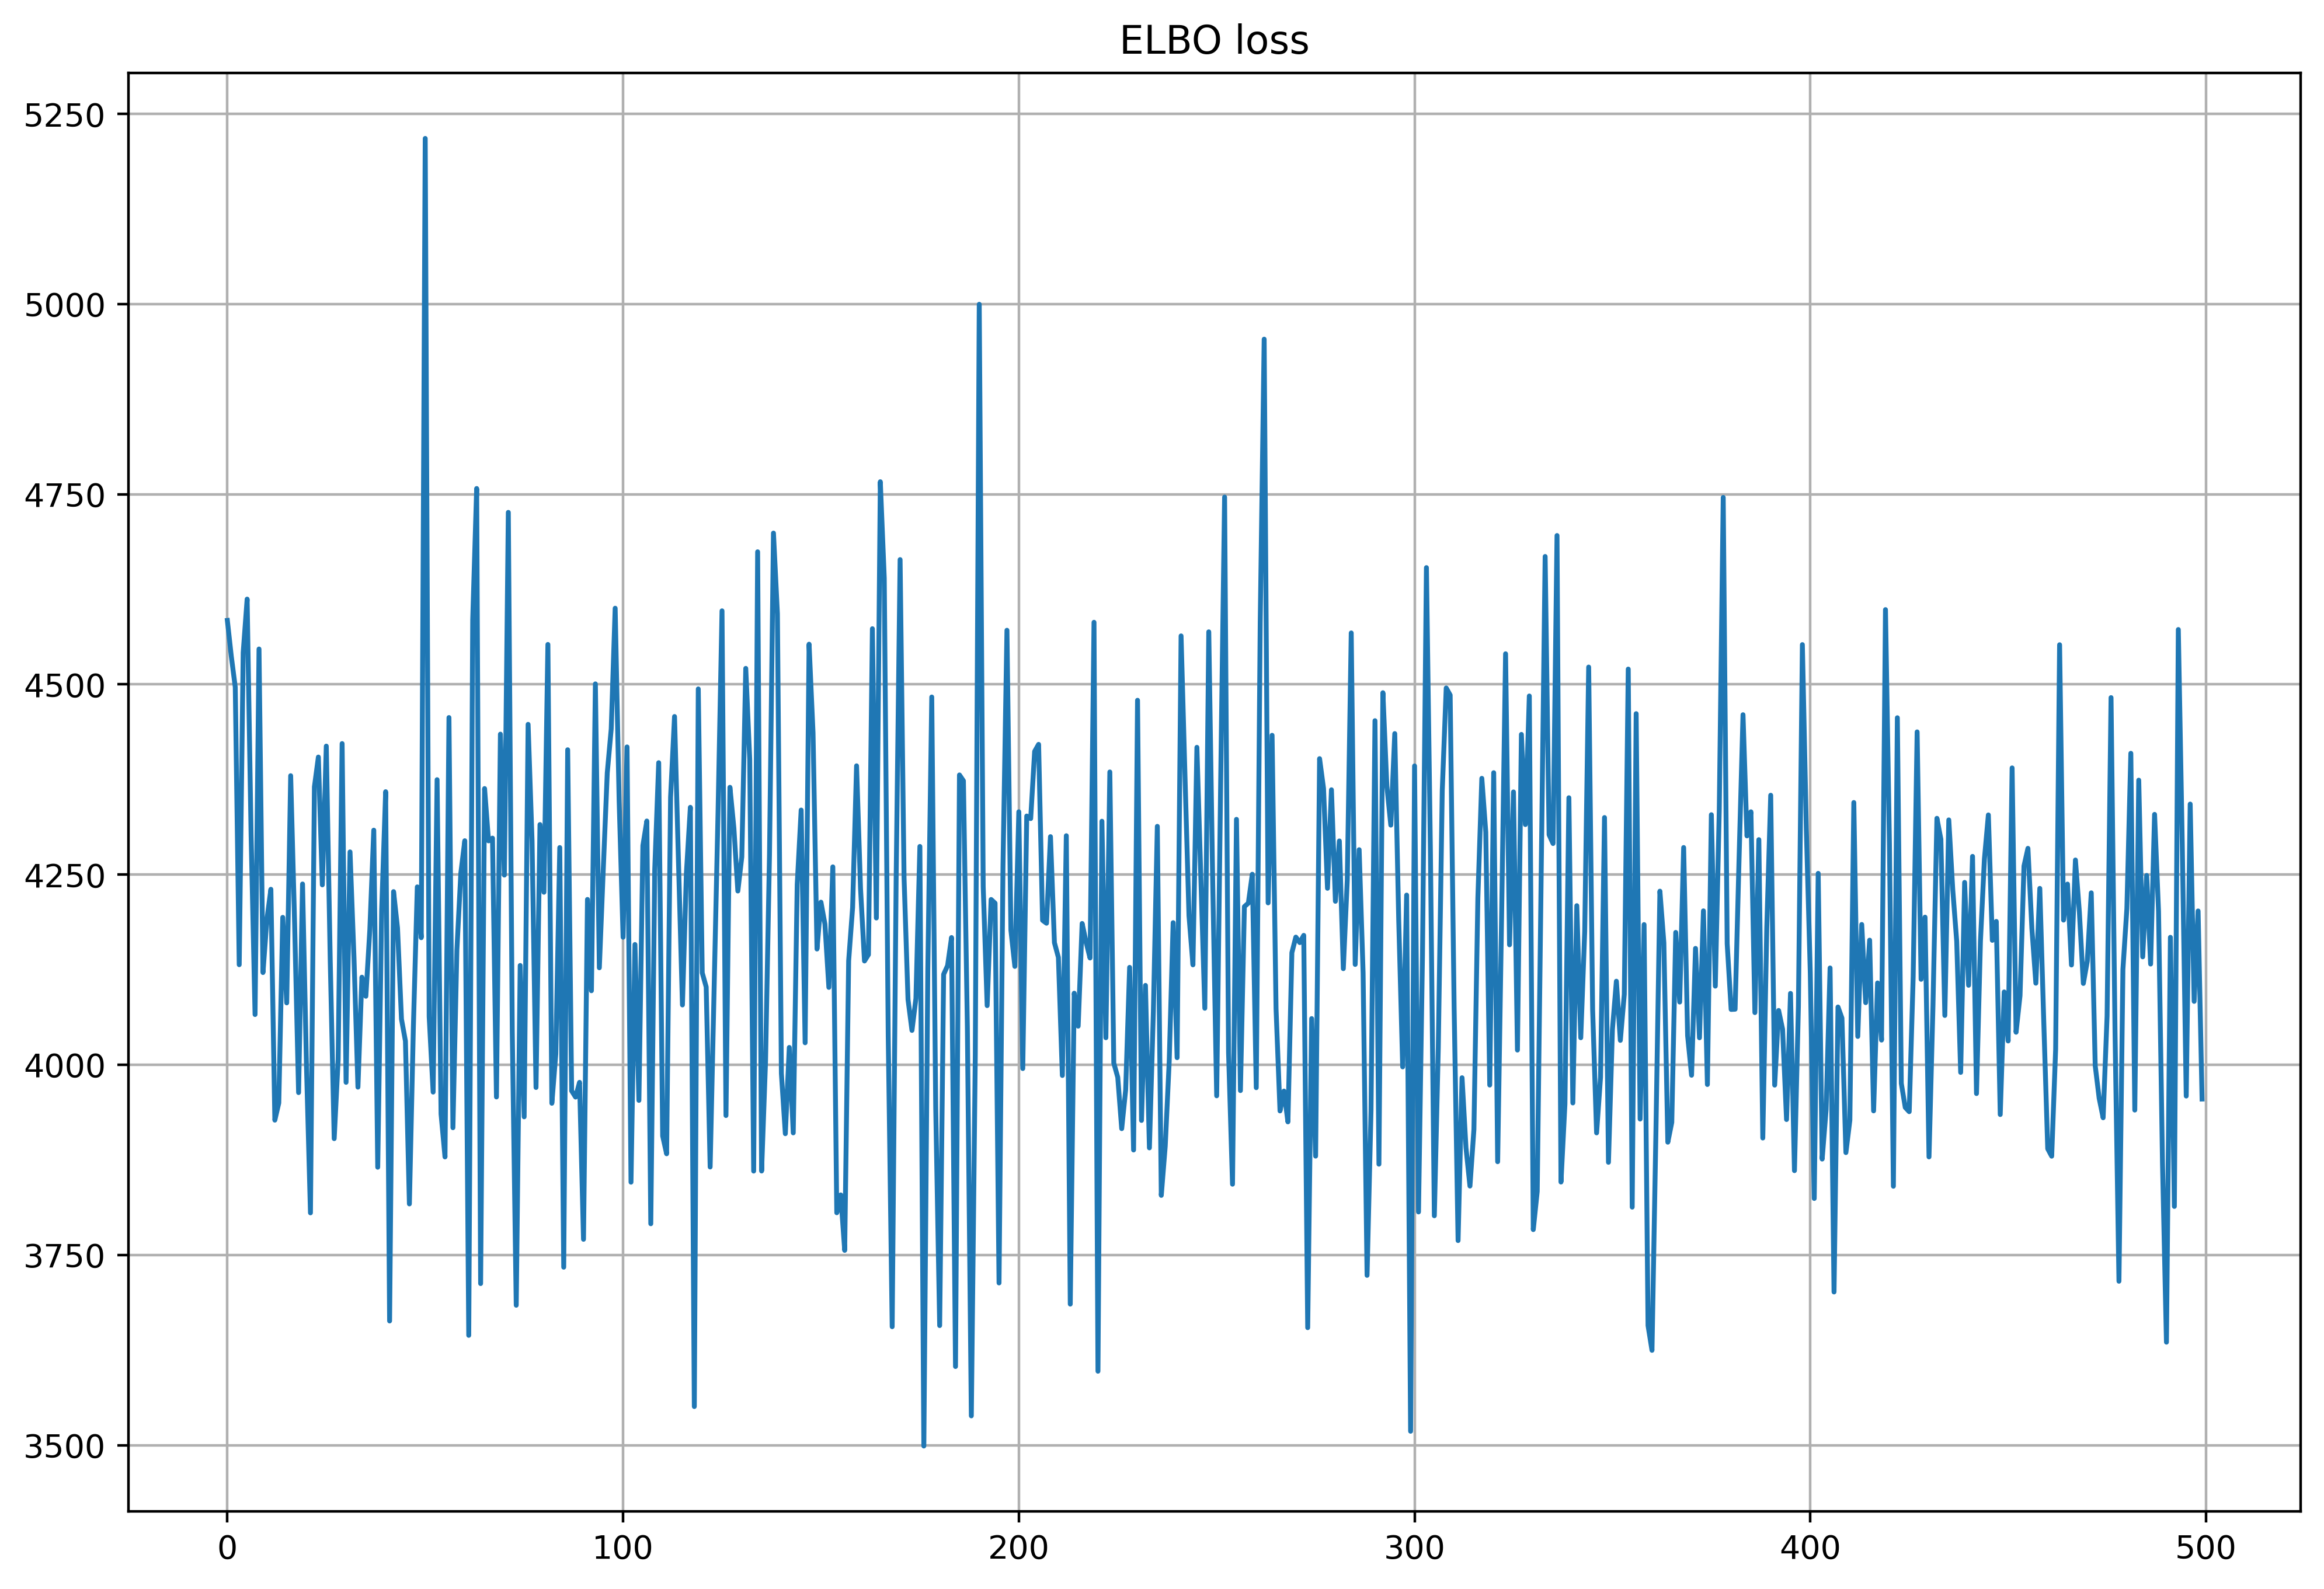

In [9]:
if __name__ == '__main__' :
    plt.plot(r.history['elbo'])
    plt.grid()
    plt.title('ELBO loss')

(400, 2)


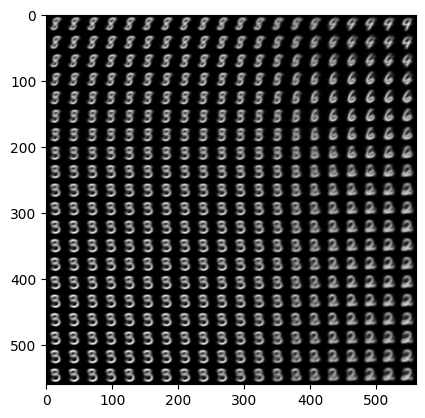

In [9]:
n = 20 #number of images per side
x_values = np.linspace(-3, 3, n)
y_values = np.linspace(-3, 3, n)
image = np.empty((28 * n, 28 * n))

Z = []
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values) :
        z  = [x, y]
        Z.append(z)
Z = np.array(Z)
print(Z.shape)        
X_recon = vae.prior_predictive_sample_with_input(Z)[1]

k = 0
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values) :
        x_recon = X_recon[k].numpy()
        k += 1
        
        x_recon = x_recon.reshape(28, 28)
        image[(n - i - 1) * 28 : (n - i) * 28, j * 28: (j + 1) * 28] = x_recon
plt.imshow(image, cmap = 'gray')
plt.show()